# Introduction - Using COSINE Metric

In this notebook we demonstrate the use of **LSI (Latent Semantic Indexing)** technique of Information Retrieval context to make trace link recovery between Features and Bug Reports.

We model our study as follows:

* Each bug report title, summary and description compose a single query.
* We use each feature description and title as an entire document that must be returned to the query made

This notebook follows the analysis made in **oracle_v2_analysis**, where we obtained a Cohen's kappa score of _0.41_ between the answers of the researcher and the answers of the volunteers.

# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from mod_finder_util import mod_finder_util
mod_finder_util.add_modules_origin_search_path()

import pandas as pd
import pprint

from modules.models_runner.feat_br_models_runner import Feat_BR_Models_Runner
from modules.utils import aux_functions
from modules.utils import model_evaluator as m_eval
from modules.utils import firefox_dataset_p2 as fd
from modules.utils import similarity_measures as sm
from modules.utils import br_feat_final_matrix_handler as b2f_handler

from matplotlib import pyplot as plt

import warnings; warnings.simplefilter('ignore')

# Load Datasets

In [3]:
bugreports = fd.Datasets.read_selected_bugreports_df()
features = fd.Datasets.read_features_df()

SelectedBugReports.shape: (91, 18)
Features.shape: (19, 8)


# Running LSI Model - Exp-Vol UNION Oracle

In [4]:
models_runner_1 = Feat_BR_Models_Runner()

lsi_model_1 = models_runner_1.run_lsi_model()

evaluator_1 = m_eval.ModelEvaluator(oracle=fd.Feat_BR_Oracles.read_feat_br_expert_volunteers_union_df().T)

sim_thresh = 0.0

lsi_eval_t1 = evaluator_1.evaluate_model(model=lsi_model_1, top_value=1, sim_threshold=sim_thresh)
lsi_eval_t3 = evaluator_1.evaluate_model(model=lsi_model_1, top_value=3, sim_threshold=sim_thresh)
lsi_eval_t5 = evaluator_1.evaluate_model(model=lsi_model_1, top_value=5, sim_threshold=sim_thresh)
lsi_eval_t10 = evaluator_1.evaluate_model(model=lsi_model_1, top_value=10, sim_threshold=sim_thresh)

Features.shape: (19, 8)
SelectedBugReports.shape: (91, 18)
Running LSI model -----
Expert and Volunteers Matrix UNION.shape: (91, 19)


# Similarity Matrix

In [5]:
aux_functions.highlight_df(lsi_model_1.get_sim_matrix().iloc[0:23, 0:14])

Bug_Number,1248267,1248268,1257087,1264988,1267480,1267501,1269348,1269485,1270274,1270983,1271607,1276120,1277937,1278388
feat_name,,,,,,,,,,,,,,
new_awesome_bar,0.319831,0.579015,0.701617,0.970652,0.168596,0.595326,0.182494,0.626678,0.168596,0.289878,0.435938,0.631222,0.660089,0.168596
windows_child_mode,0.0576609,0.431756,0.175933,0.0806502,0.226347,0.229927,0.0765789,0.244231,0.226347,0.108769,0.371871,0.334486,0.18745,0.226347
apz_async_scrolling,0.00131195,0.0307477,0.0562327,0.0662135,0.0423467,0.269689,0.00531979,0.174886,0.0423467,0.0203494,0.145329,0.0483971,0.0722267,0.0423467
browser_customization,0.0284819,0.310179,0.0675093,0.1447,0.54226,0.0486418,0.11549,0.0529128,0.54226,0.260579,0.228176,0.0649509,0.240459,0.54226
pdf_viewer,0.00595923,0.0521395,0.0141249,0.016632,0.19235,0.0101773,0.0241639,0.0110709,0.19235,0.0924323,0.00708094,0.0230393,0.130757,0.19235
context_menu,0.974364,0.441724,0.463439,0.127107,0.0525273,0.356897,0.0542587,0.438595,0.0525273,0.878534,0.350882,0.356687,0.105141,0.0525273
w10_comp,0.190952,0.355716,0.237987,0.244861,0.451706,0.532181,0.188005,0.545444,0.451706,0.384114,0.839796,0.726589,0.450969,0.451706
tts_in_desktop,0.0197604,0.220573,0.0468372,0.0935,0.416061,0.593322,0.0801258,0.514946,0.416061,0.199935,0.137769,0.0498351,0.260926,0.416061
tts_in_rm,0.0262042,0.285374,0.0621106,0.133128,0.498896,0.427691,0.106255,0.422753,0.498896,0.239741,0.209929,0.21255,0.263051,0.498896


# Analysis of BR x Feat Generated Traces

In [6]:
handler = b2f_handler.BR_Feat_Final_Matrix_Handler(mode=b2f_handler.HandlerMode.LOAD)
br_2_features_matrix_final = handler.add_mappings_1(columns_names=['Features_IDs_lsi_t1_m',
                                                                   'Features_IDs_lsi_t3_m',
                                                                   'Features_IDs_lsi_t5_m',
                                                                   'Features_IDs_lsi_t10_m',
                                                                   'Features_IDs_orc'],
                                                    trace_matrices=[lsi_eval_t1['trace_links_df'],
                                                                    lsi_eval_t3['trace_links_df'],
                                                                    lsi_eval_t5['trace_links_df'],
                                                                    lsi_eval_t10['trace_links_df'],
                                                                    evaluator_1.get_oracle_df()],
                                                    is_from_model=True)

br_2_features_matrix_final = handler.add_mappings_2(dest_columns_names=['f_names_lsi_t1',
                                                                        'f_names_lsi_t3',
                                                                        'f_names_lsi_t5',
                                                                        'f_names_lsi_t10',
                                                                        'f_names_orc'],
                                                   orig_columns_names=['Features_IDs_lsi_t1_m',
                                                                       'Features_IDs_lsi_t3_m',
                                                                       'Features_IDs_lsi_t5_m',
                                                                       'Features_IDs_lsi_t10_m',
                                                                       'Features_IDs_orc'])
br_2_features_matrix_final.head(10)

SelectedBugReports.shape: (91, 18)
Features.shape: (19, 8)
BR_2_Features Matrix Final.shape: (91, 5)


,bug_title,Features_IDs_exp_m,Features_IDs_vol_m,Features_IDs_exp_vol_union_m,Features_IDs_exp_vol_intersec_m,Features_IDs_lsi_t1_m,Features_IDs_lsi_t3_m,Features_IDs_lsi_t5_m,Features_IDs_lsi_t10_m,Features_IDs_orc,f_names_lsi_t1,f_names_lsi_t3,f_names_lsi_t5,f_names_lsi_t10,f_names_orc
Bug_Number,,,,,,,,,,,,,,,
1248267,"Right click on bookmark item of ""Recently Book...",6,6,6,6,6,1 6 7,1 2 6 7 19,1 2 4 6 7 8 9 16 17 19,6,[[context_menu]],"[[new_awesome_bar], [context_menu], [w10_comp]]","[[new_awesome_bar], [windows_child_mode], [con...","[[new_awesome_bar], [windows_child_mode], [bro...",[[context_menu]]
1248268,"Unable to disable ""Recently bookmarked""",,4,4,,1,1 6 16,1 2 6 7 16,1 2 4 6 7 8 9 10 16 18,4,[[new_awesome_bar]],"[[new_awesome_bar], [context_menu], [webgl2]]","[[new_awesome_bar], [windows_child_mode], [con...","[[new_awesome_bar], [windows_child_mode], [bro...",[[browser_customization]]
1257087,Middle mouse click on history item would not open,,,,,1,1 6 12,1 2 6 7 12,1 2 3 4 6 7 9 12 16 19,,[[new_awesome_bar]],"[[new_awesome_bar], [context_menu], [pointer_l...","[[new_awesome_bar], [windows_child_mode], [con...","[[new_awesome_bar], [windows_child_mode], [apz...",[]
1264988,Scrollbar appears for a moment in the new Awes...,1,1,1,1,1,1 4 7,1 4 7 9 16,1 4 6 7 8 9 10 14 16 19,1,[[new_awesome_bar]],"[[new_awesome_bar], [browser_customization], [...","[[new_awesome_bar], [browser_customization], [...","[[new_awesome_bar], [browser_customization], [...",[[new_awesome_bar]]
1267480,Intermittent browser/components/preferences/in...,,,,,16,4 9 16,4 7 8 9 16,2 4 5 7 8 9 10 11 16 19,,[[webgl2]],"[[browser_customization], [tts_in_rm], [webgl2]]","[[browser_customization], [w10_comp], [tts_in_...","[[windows_child_mode], [browser_customization]...",[]
1267501,New Private Browsing start-page overflows off ...,3,,3,,1,1 7 8,1 6 7 8 9,1 2 3 6 7 8 9 12 13 14,3,[[new_awesome_bar]],"[[new_awesome_bar], [w10_comp], [tts_in_desktop]]","[[new_awesome_bar], [context_menu], [w10_comp]...","[[new_awesome_bar], [windows_child_mode], [apz...",[[apz_async_scrolling]]
1269348,Show last sync date tooltip on Synced Tabs sid...,,,,,18,1 7 18,1 4 7 18 19,1 2 4 7 8 9 12 16 18 19,,[[indicator_device_perm]],"[[new_awesome_bar], [w10_comp], [indicator_dev...","[[new_awesome_bar], [browser_customization], [...","[[new_awesome_bar], [windows_child_mode], [bro...",[]
1269485,New Private Browsing start-page has white/gray...,3,,3,,1,1 7 8,1 6 7 8 9,1 2 3 6 7 8 9 13 14 17,3,[[new_awesome_bar]],"[[new_awesome_bar], [w10_comp], [tts_in_desktop]]","[[new_awesome_bar], [context_menu], [w10_comp]...","[[new_awesome_bar], [windows_child_mode], [apz...",[[apz_async_scrolling]]
1270274,Intermittent browser_share.jsuncaught exceptio...,,,,,16,4 9 16,4 7 8 9 16,2 4 5 7 8 9 10 11 16 19,,[[webgl2]],"[[browser_customization], [tts_in_rm], [webgl2]]","[[browser_customization], [w10_comp], [tts_in_...","[[windows_child_mode], [browser_customization]...",[]


# Analysis of Precision and Recall

## Union Strategy

Evaluating LSI Model ----- 


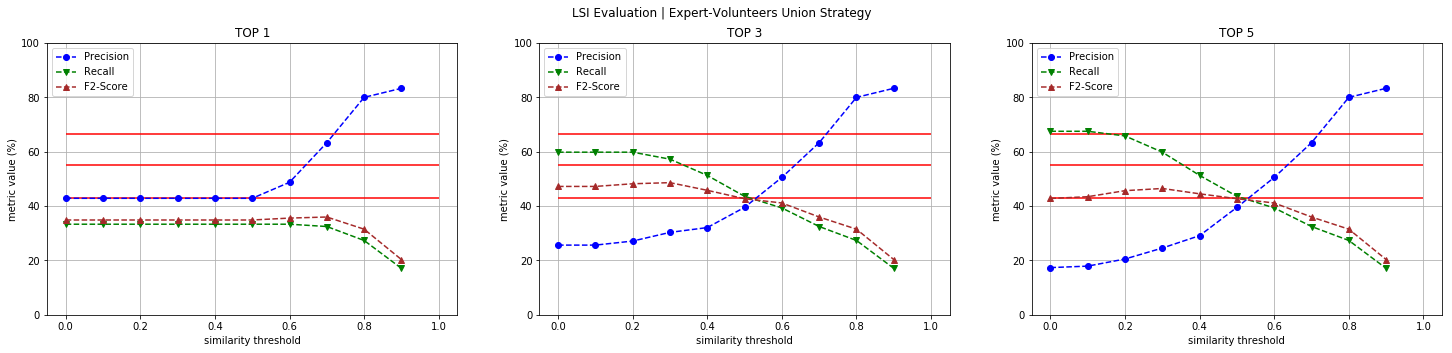

In [18]:
results_1 = evaluator_1.run_evaluator(models=[lsi_model_1], top_values=[1,3,5], sim_thresholds=[(sm.SimilarityMeasure.COSINE, s_thresh/10) for s_thresh in range(0,10)])
evaluator_1.plot_evaluations_2(title='LSI Evaluation | Expert-Volunteers Union Strategy', results=results_1, model_name='lsi')

## Intersec Strategy

Expert and Volunteers Matrix INTERSEC.shape: (91, 19)
Evaluating LSI Model ----- 


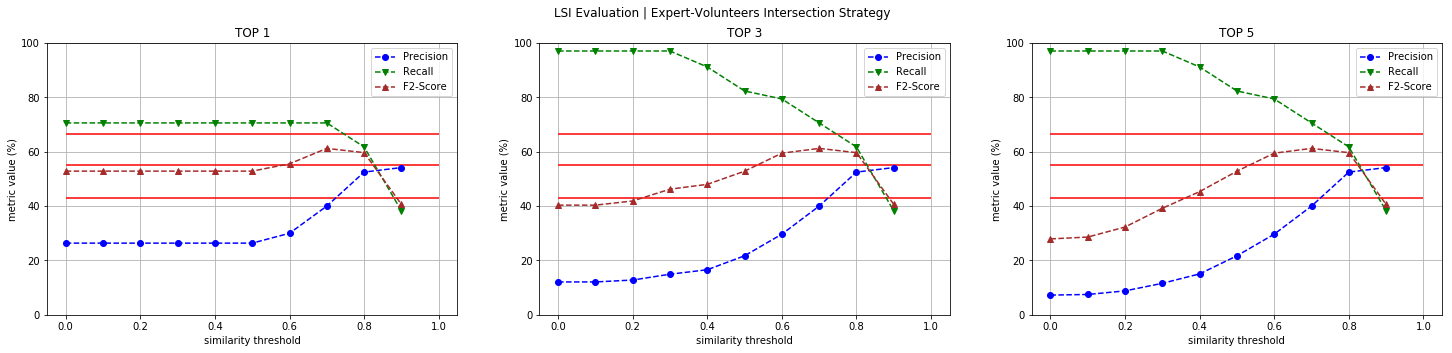

In [19]:
evaluator_2 = m_eval.ModelEvaluator(oracle=fd.Feat_BR_Oracles.read_feat_br_expert_volunteers_intersec_df().T)
results_2 = evaluator_2.run_evaluator(models=[lsi_model_1], top_values=[1,3,5], sim_thresholds=[(sm.SimilarityMeasure.COSINE, s_thresh/10) for s_thresh in range(0,10)])
evaluator_2.plot_evaluations_2(title='LSI Evaluation | Expert-Volunteers Intersection Strategy', results=results_2, model_name='lsi')

## Volunteers-Only Strategy

Feat_BR Volunteers Matrix shape: (91, 19)
Evaluating LSI Model ----- 


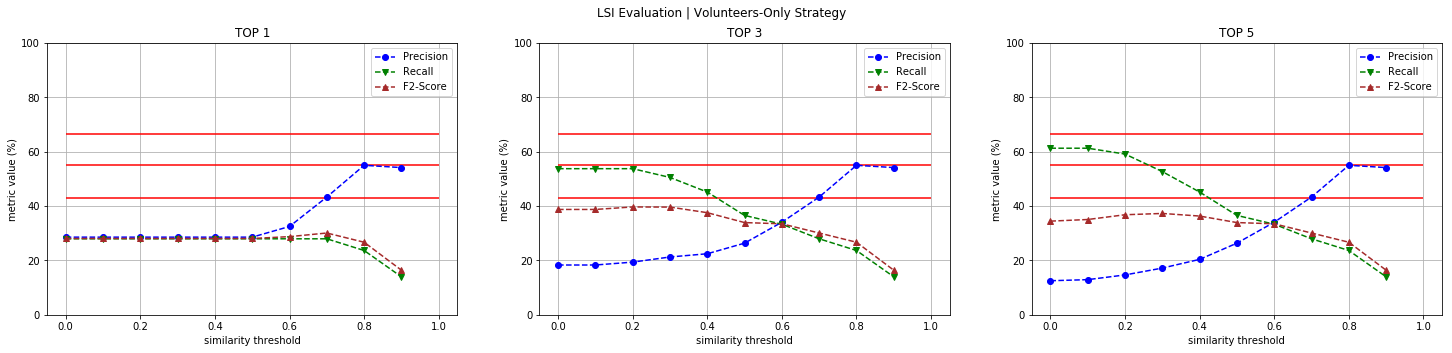

In [20]:
evaluator_4 = m_eval.ModelEvaluator(oracle=fd.Feat_BR_Oracles.read_feat_br_volunteers_df().T)
results_4 = evaluator_4.run_evaluator(models=[lsi_model_1], top_values=[1,3,5], sim_thresholds=[(sm.SimilarityMeasure.COSINE, s_thresh/10) for s_thresh in range(0,10)])
evaluator_4.plot_evaluations_2(title='LSI Evaluation | Volunteers-Only Strategy', results=results_4, model_name='lsi')

## Expert-Only Strategy

Feat_BR Expert Matrix shape: (91, 19)
Evaluating LSI Model ----- 


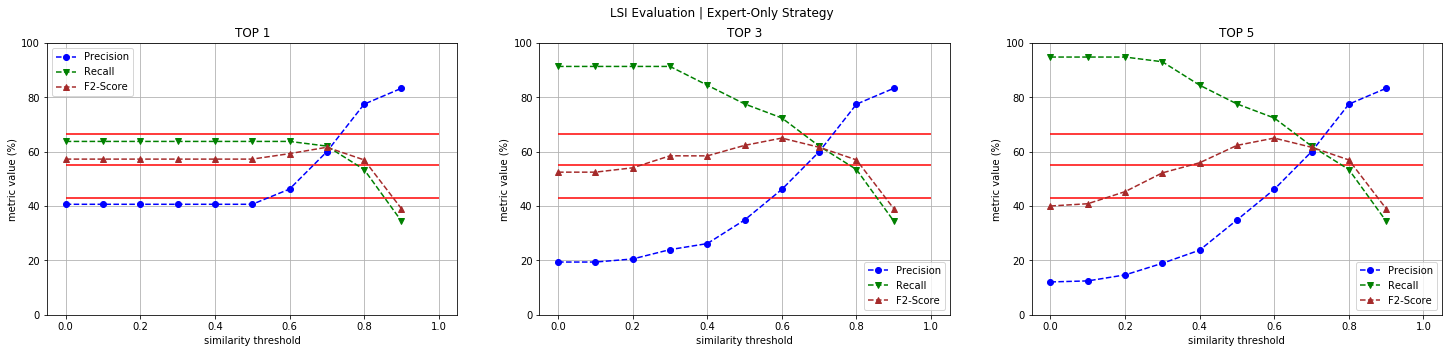

In [21]:
evaluator_3 = m_eval.ModelEvaluator(oracle=fd.Feat_BR_Oracles.read_feat_br_expert_df().T)
results_3 = evaluator_3.run_evaluator(models=[lsi_model_1], top_values=[1,3,5], sim_thresholds=[(sm.SimilarityMeasure.COSINE, s_thresh/10) for s_thresh in range(0,10)])
evaluator_3.plot_evaluations_2(title='LSI Evaluation | Expert-Only Strategy', results=results_3, model_name='lsi')

# Analysis of False Positives

_Analysis of BR-Feat Traces with Low Precision_

In [10]:
models_runner_2 = Feat_BR_Models_Runner()
lsi_model_2 = models_runner_2.run_lsi_model()

evaluator_2 = m_eval.ModelEvaluator(oracle=fd.Feat_BR_Oracles.read_feat_br_expert_volunteers_union_df().T)
results_2 = evaluator_2.evaluate_model(model=lsi_model_2, top_value=3, sim_threshold=0.0)

Features.shape: (19, 8)
SelectedBugReports.shape: (91, 18)
Running LSI model -----
Expert and Volunteers Matrix UNION.shape: (91, 19)


In [11]:
display(aux_functions.highlight_df(lsi_model_2.get_sim_matrix().iloc[0:23, 0:14]))
display(aux_functions.highlight_df(evaluator_2.get_oracle_df().iloc[0:23, 0:14]))
display(aux_functions.highlight_df(results_2['trace_links_df'].iloc[0:23, 0:14]))

Bug_Number,1248267,1248268,1257087,1264988,1267480,1267501,1269348,1269485,1270274,1270983,1271607,1276120,1277937,1278388
feat_name,,,,,,,,,,,,,,
new_awesome_bar,0.319831,0.579015,0.701617,0.970652,0.168596,0.595326,0.182494,0.626678,0.168596,0.289878,0.435938,0.631222,0.660089,0.168596
windows_child_mode,0.0576609,0.431756,0.175933,0.0806502,0.226347,0.229927,0.0765789,0.244231,0.226347,0.108769,0.371871,0.334486,0.18745,0.226347
apz_async_scrolling,0.00131195,0.0307477,0.0562327,0.0662135,0.0423467,0.269689,0.00531979,0.174886,0.0423467,0.0203494,0.145329,0.0483971,0.0722267,0.0423467
browser_customization,0.0284819,0.310179,0.0675093,0.1447,0.54226,0.0486418,0.11549,0.0529128,0.54226,0.260579,0.228176,0.0649509,0.240459,0.54226
pdf_viewer,0.00595923,0.0521395,0.0141249,0.016632,0.19235,0.0101773,0.0241639,0.0110709,0.19235,0.0924323,0.00708094,0.0230393,0.130757,0.19235
context_menu,0.974364,0.441724,0.463439,0.127107,0.0525273,0.356897,0.0542587,0.438595,0.0525273,0.878534,0.350882,0.356687,0.105141,0.0525273
w10_comp,0.190952,0.355716,0.237987,0.244861,0.451706,0.532181,0.188005,0.545444,0.451706,0.384114,0.839796,0.726589,0.450969,0.451706
tts_in_desktop,0.0197604,0.220573,0.0468372,0.0935,0.416061,0.593322,0.0801258,0.514946,0.416061,0.199935,0.137769,0.0498351,0.260926,0.416061
tts_in_rm,0.0262042,0.285374,0.0621106,0.133128,0.498896,0.427691,0.106255,0.422753,0.498896,0.239741,0.209929,0.21255,0.263051,0.498896


Bug_Number,1248267,1248268,1257087,1264988,1267480,1267501,1269348,1269485,1270274,1270983,1271607,1276120,1277937,1278388
new_awesome_bar,0,0,0,1,0,0,0,0,0,0,1,1,1,1
windows_child_mode,0,0,0,0,0,0,0,0,0,0,0,0,0,0
apz_async_scrolling,0,0,0,0,0,1,0,1,0,0,0,0,0,0
browser_customization,0,1,0,0,0,0,0,0,0,0,0,0,0,0
pdf_viewer,0,0,0,0,0,0,0,0,0,0,0,0,0,0
context_menu,1,0,0,0,0,0,0,0,0,1,0,0,0,0
w10_comp,0,0,0,0,0,0,0,0,0,0,0,0,0,0
tts_in_desktop,0,0,0,0,0,0,0,0,0,0,0,0,0,0
tts_in_rm,0,0,0,0,0,0,0,0,0,0,0,0,0,0
webgl_comp,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Bug_Number,1248267,1248268,1257087,1264988,1267480,1267501,1269348,1269485,1270274,1270983,1271607,1276120,1277937,1278388
feat_name,,,,,,,,,,,,,,
new_awesome_bar,1,1,1,1,0,1,1,1,0,1,1,1,1,0
windows_child_mode,0,0,0,0,0,0,0,0,0,0,1,0,0,0
apz_async_scrolling,0,0,0,0,0,0,0,0,0,0,0,0,0,0
browser_customization,0,0,0,1,1,0,0,0,1,0,0,0,0,1
pdf_viewer,0,0,0,0,0,0,0,0,0,0,0,0,0,0
context_menu,1,1,1,0,0,0,0,0,0,1,0,1,0,0
w10_comp,1,0,0,1,0,1,1,1,0,1,1,1,1,0
tts_in_desktop,0,0,0,0,0,1,0,1,0,0,0,0,0,0
tts_in_rm,0,0,0,0,1,0,0,0,1,0,0,0,0,1


In [12]:
eval_df = results_2['eval_df']

KeyError: 'eval_df'

In [ ]:
new_df = pd.concat([br_2_features_matrix_final,eval_df], axis=1)
print(new_df.shape)
display(new_df.head(10))

# Analysis of False Negatives

_Analysis of BR-Feat Traces with Low Recall_